# Predicting bike rentals using random forest
## Reading and exploring the data

In [47]:
import pandas as pd
bike_rentals = pd.read_csv('bike_rental_hour.csv')
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


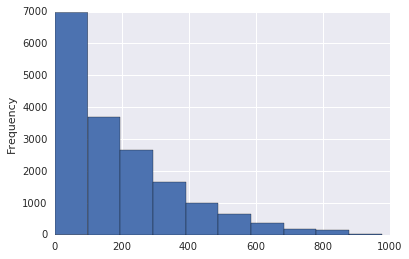

In [48]:
%matplotlib inline
bike_rentals['cnt'].plot.hist()

In [49]:
bike_rentals.corr()['cnt'].abs().sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

Temperature and hour of day are pretty good indicators of the number of rentals.

## Feature engineering
We can increase the model's knowledge by grouping hours by time of day, linking closer hours together.

In [50]:
def assign_label(hour):
    if (hour>=6 and hour<12):
        return 1
    elif (hour>=12 and hour<18):
        return 2
    elif (hour>=18 and hour<24):
        return 3
    else:
        return 4

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   time_label  
0           4  
1           4  
2           4  
3           4  
4           

## Dividing into training and testing sets

In [51]:
train = bike_rentals.sample(int(len(bike_rentals)*.8))
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Linear Regression model

In [52]:
features = bike_rentals.columns.tolist()
features.remove('casual')
features.remove('registered')
features.remove('dteday')
features.remove('cnt')
features.remove('instant')
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

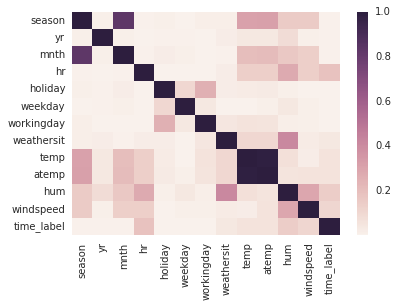

In [53]:
import seaborn as sns
sns.heatmap(bike_rentals[features].corr().abs())

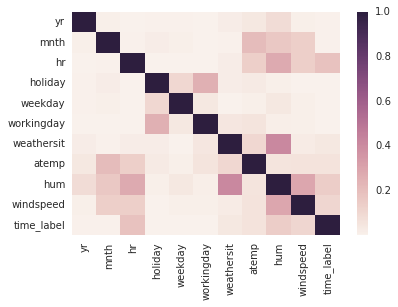

In [54]:
features.remove('season')
features.remove('temp')
sns.heatmap(bike_rentals[features].corr().abs())

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
target = 'cnt'
model.fit(train[features], train[target])
predictions = model.predict(test[features])
rmse = mean_squared_error(predictions, test[target])**.5
rmse

133.60985720511505

The error is quite large...
## Decision Tree Model

In [58]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train[features], train[target])
predictions = model.predict(test[features])
rmse = mean_squared_error(predictions, test[target])**.5
rmse

65.39868656810427

Much better! Let's try to fine tune it...

In [62]:
model = DecisionTreeRegressor(min_samples_leaf=5)
model.fit(train[features], train[target])
predictions = model.predict(test[features])
rmse = mean_squared_error(predictions, test[target])**.5
rmse

55.60577750272058

Can get even better results by optimizing parameters.

## Random Forest model

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = DecisionTreeRegressor(min_samples_leaf=5)

model.fit(train[features], train[target])
predictions = model.predict(test[features])
rmse = mean_squared_error(predictions, test[target])**.5
rmse